# Model Evaluation

Below, the training and test data will be evaluated against different models. The evaluation will be accompanied with different accuracy checks to determine performance.

In [73]:
import pandas as pd
from sklearn.metrics import  root_mean_squared_error

# I know it is hitchhiker's guide to the galaxy
r_state = 42

models_train = []
models_test = []

In [74]:
train_df = pd.read_csv('data/train_data.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('data/test_data.csv', index_col='Unnamed: 0')

columns = train_df.columns

print (columns)


Index(['HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating',
       'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg',
       'norm_popularity_rating', 'std_hosp_count_7day_avg',
       'std_death_count_7day_avg', 'std_popularity_rating', 'y'],
      dtype='object')


In [75]:
X_train = train_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'std_hosp_count_7day_avg', 'std_death_count_7day_avg', 'std_popularity_rating', 'popularity_rating'], axis=1)
y_train = train_df['y'].apply( lambda x: 1.0 * x)

X_test = test_df.drop(labels=['y', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'std_hosp_count_7day_avg', 'std_death_count_7day_avg', 'std_popularity_rating', 'popularity_rating'], axis=1)
y_test = test_df['y'].apply( lambda x: 1.0 * x)

In [76]:

y_train.info()

<class 'pandas.core.series.Series'>
Index: 238 entries, 0 to 237
Series name: y
Non-Null Count  Dtype  
--------------  -----  
238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [77]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 238 to 297
Series name: y
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [78]:
X_train.head()

,norm_hosp_count_7day_avg,norm_death_count_7day_avg,norm_popularity_rating
0,0.000000,0.00000,0.000000
1,0.004785,0.00000,0.236559
2,0.069976,0.00129,0.387097
3,0.349880,0.04129,0.494624
4,0.845096,0.28000,0.655914


In [79]:
X_train.describe()

,norm_hosp_count_7day_avg,norm_death_count_7day_avg,norm_popularity_rating
count,238.000000,238.000000,238.000000
mean,0.080845,0.036525,0.316075
std,0.125023,0.105496,0.241630
min,0.000000,0.000000,0.000000
25%,0.021531,0.005161,0.131720
50%,0.042464,0.010968,0.247312
75%,0.083583,0.022903,0.462366
max,1.000000,1.000000,1.000000


In [80]:
def plot_line(y1, y2):
    working_data = {
        'y_test' : y1,
        'y_pred': y2
    }

    working_df = pd.DataFrame(working_data)
    working_df.plot(kind="line", xlabel="Week No.", ylabel="Average Count")

In [81]:
def gen_model_entry(name, y1, y2):
    entry = {
        'model' : name,
        'rmse' : root_mean_squared_error(y1, y2)
    }    

    return entry

## Bsaeline

In [82]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
dum_model = reg.fit(X_train, y_train)

y_pred = dum_model.predict(X_test)

In [83]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

1700.2091990783385


In [84]:
models_test.append(gen_model_entry('Dummy Regressor', y_test, y_pred))

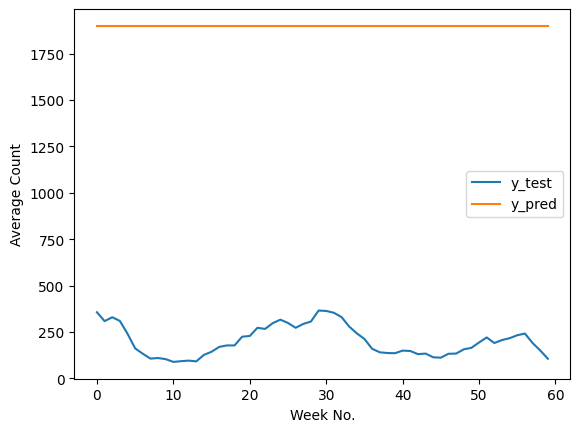

In [85]:
plot_line(y_test.to_list(), y_pred)

In [86]:
y_pred = dum_model.predict(X_train)
models_train.append(gen_model_entry('Dummy Regressor', y_train.to_list(), y_pred))

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=r_state, max_iter=1000)
log_model = reg.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)


In [88]:
report = root_mean_squared_error(y_test, y_pred )
print (report)

4992.276000650071


In [89]:
models_test.append(gen_model_entry('Logistic Regressor', y_test, y_pred))

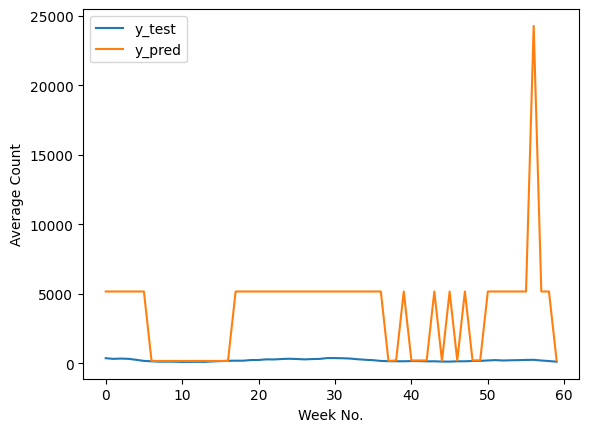

In [90]:
plot_line(y_test.to_list(), y_pred)

In [91]:
y_pred = log_model.predict(X_train)
models_train.append(gen_model_entry('Logistic Regressor', y_train.to_list(), y_pred))

## Linear Regressor

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linear_model = reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [93]:
report = root_mean_squared_error(y_test, y_pred)
print (report)

6053.579455318343


In [94]:
models_test.append(gen_model_entry('Linear Regressor', y_test, y_pred))

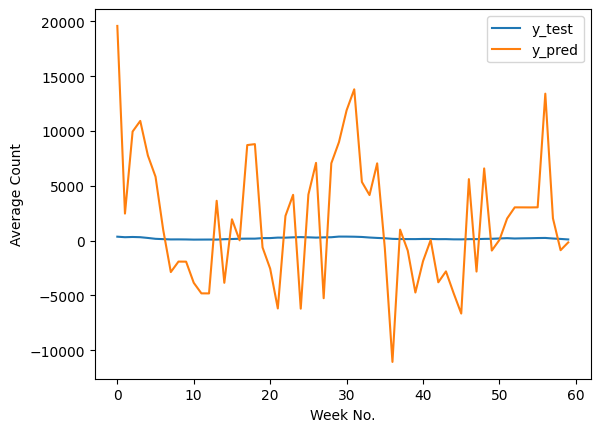

In [95]:
plot_line(y_test.to_list(), y_pred)

In [96]:
y_pred = linear_model.predict(X_train)
models_train.append(gen_model_entry('Linear Regressor', y_train.to_list(), y_pred))

## Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
dtree_model = reg.fit(X_train, y_train)

y_pred = dtree_model.predict(X_test)

In [98]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4903.359406230249


In [99]:
models_test.append(gen_model_entry('Tree Regressor', y_test, y_pred))

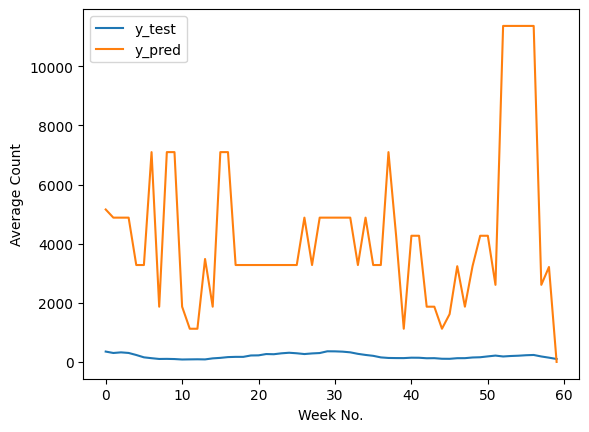

In [100]:
plot_line(y_test.to_list(), y_pred)

In [101]:
y_pred = dtree_model.predict(X_train)
models_train.append(gen_model_entry('Tree Regressor', y_train.to_list(), y_pred))

## Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
rfg_model = reg.fit(X_train, y_train)

y_pred = rfg_model.predict(X_test)

In [103]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6811.444736971983


In [104]:
models_test.append(gen_model_entry('Random Forest Regressor', y_test, y_pred))

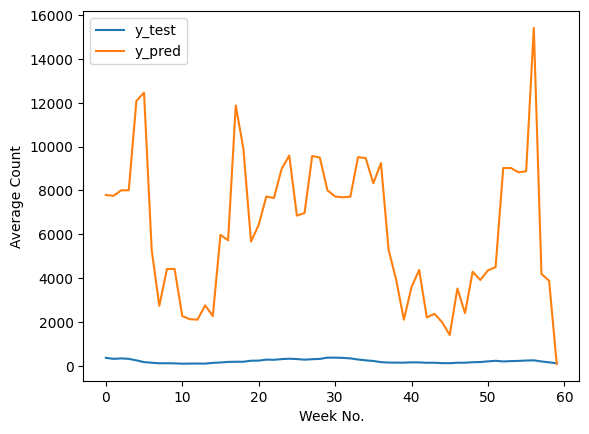

In [105]:
plot_line(y_test.to_list(), y_pred)

In [106]:
y_pred = rfg_model.predict(X_train)
models_train.append(gen_model_entry('Random Forest Regressor', y_train.to_list(), y_pred))

## Gradient Boost Regressor

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
gbr_model = reg.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

In [108]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

5218.450597197741


In [109]:
models_test.append(gen_model_entry('Gradient Boost Regressor', y_test, y_pred))

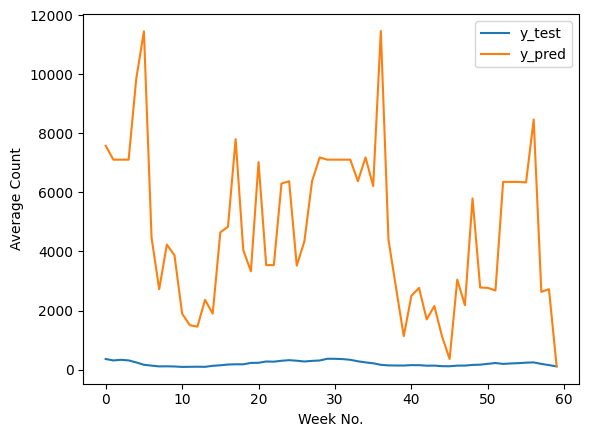

In [110]:
plot_line(y_test.to_list(), y_pred)

In [111]:
y_pred = gbr_model.predict(X_train)
models_train.append(gen_model_entry('Gradient Boost Regressor', y_train.to_list(), y_pred))

## XGBoost Regressor

In [112]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=r_state)
xgb_model = reg.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [113]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

4574.220465926105


In [114]:
models_test.append(gen_model_entry('XGBoost Regressor', y_test, y_pred))

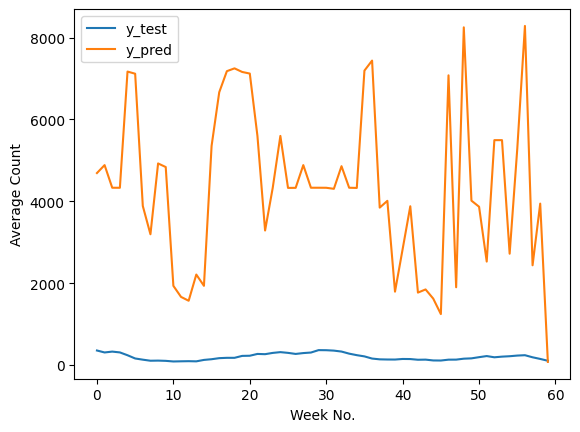

In [115]:
plot_line(y_test.to_list(), y_pred)

In [116]:
y_pred = xgb_model.predict(X_train)
models_train.append(gen_model_entry('XGBoost Regressor', y_train.to_list(), y_pred))

## Bayes Regressor

In [117]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
br_model = reg.fit(X_train, y_train)

y_pred = br_model.predict(X_test)

In [118]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6004.55275700514


In [119]:
models_test.append(gen_model_entry('Bayes Regressor', y_test, y_pred))

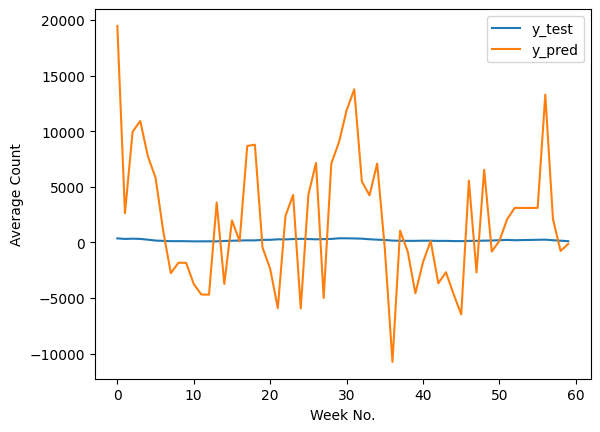

In [120]:
plot_line(y_test.to_list(), y_pred)

In [121]:
y_pred = br_model.predict(X_train)
models_train.append(gen_model_entry('Bayes Regressor', y_train.to_list(), y_pred))

## Linear Support Vector Regression

In [122]:
from sklearn.svm import LinearSVR

reg = LinearSVR()
lsvr_model = reg.fit(X_train, y_train)

y_pred = lsvr_model.predict(X_test)

In [123]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

75.84143944921291


In [124]:
models_test.append(gen_model_entry('LinearSVR Regressor', y_test, y_pred))

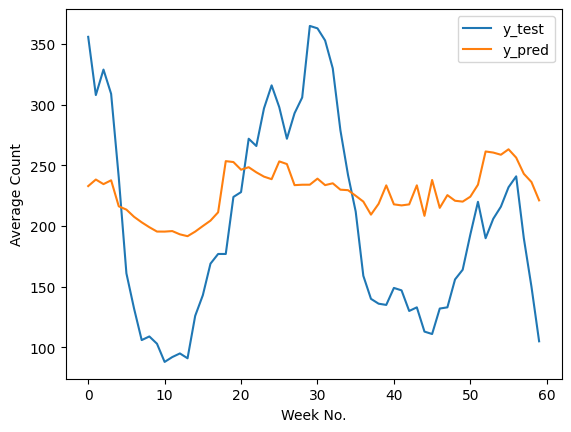

In [125]:
plot_line(y_test.to_list(), y_pred)

In [126]:
y_pred = lsvr_model.predict(X_train)
models_train.append(gen_model_entry('LinearSVR Regressor', y_train.to_list(), y_pred))

## SVR Regression

In [127]:
from sklearn.svm import SVR

reg = SVR()
svr_model = reg.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [128]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

700.9218429072756


In [129]:
models_test.append(gen_model_entry('SVR Regressor', y_test, y_pred))

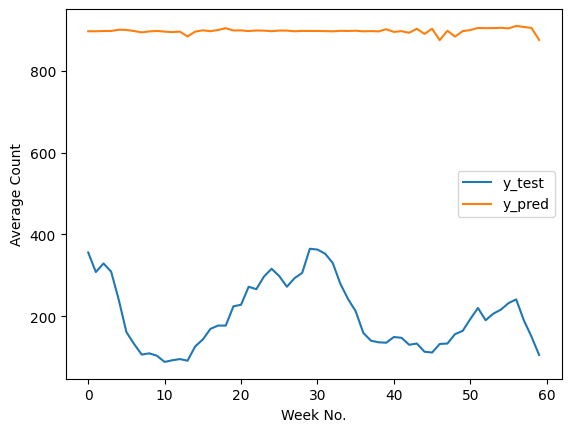

In [130]:
plot_line(y_test.to_list(), y_pred)

In [131]:
y_pred = svr_model.predict(X_train)
models_train.append(gen_model_entry('SVR Regressor', y_train.to_list(), y_pred))

## SGD Regressor

In [132]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
sgd_model = reg.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1612: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [133]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

6114.512175466702


In [134]:
models_test.append(gen_model_entry('SGD Regressor', y_test, y_pred))

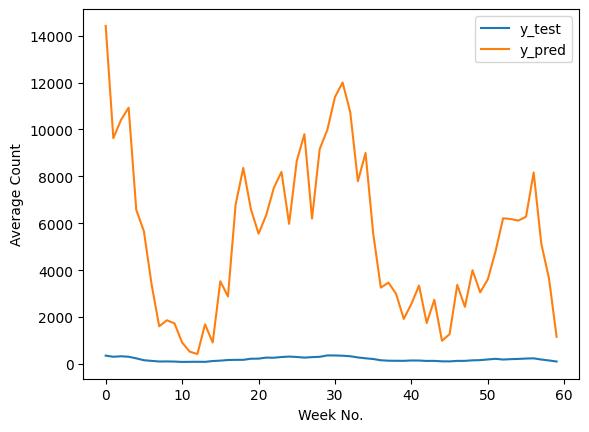

In [135]:
plot_line(y_test.to_list(), y_pred)

In [136]:
y_pred = sgd_model.predict(X_train)
models_train.append(gen_model_entry('SGD Regressor', y_train.to_list(), y_pred))

## Tabulate results

In [137]:
models_train_df = pd.DataFrame(models_train)
models_test_df = pd.DataFrame(models_test)

models_train_df['train_rmse'] = models_train_df['rmse']
models_test_df['test_rmse'] = models_test_df['rmse']

In [138]:
eval_df = pd.merge(models_train_df.drop(labels=['rmse'], axis=1), models_test_df.drop(labels=['rmse'], axis=1), on="model")

In [139]:
eval_df['diff'] = eval_df['train_rmse'] - eval_df['test_rmse']

In [140]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       11 non-null     object 
 1   train_rmse  11 non-null     float64
 2   test_rmse   11 non-null     float64
 3   diff        11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 484.0+ bytes


In [141]:
eval_df.sort_values(by=['test_rmse'], axis=0, ascending=True)

,model,train_rmse,test_rmse,diff
8,LinearSVR Regressor,4461.903100,75.841439,4386.061661
9,SVR Regressor,4254.595001,700.921843,3553.673158
0,Dummy Regressor,4136.721000,1700.209199,2436.511801
6,XGBoost Regressor,5.319849,4574.220466,-4568.900616
3,Tree Regressor,0.000000,4903.359406,-4903.359406
1,Logistic Regressor,7596.024149,4992.276001,2603.748148
5,Gradient Boost Regressor,211.000531,5218.450597,-5007.450066
7,Bayes Regressor,2700.927366,6004.552757,-3303.625391
2,Linear Regressor,2700.671150,6053.579455,-3352.908305
10,SGD Regressor,3164.583271,6114.512175,-2949.928904


It appears that when comparing all models, the LinearSVR regressor was the best at predicting the number of cases on new data as the test data had the lowest root mean square error.  Further, it was less than the Dummy regressor whch was used to establish the baseline. All other models scored a higher test rmse value. 

I also wanted to point out that the diff between the train and test root mean square error was positive for the LinearSVR regressor, Dummy regressor and Logistic Regressor. This indicates there was no overfitting by these three models. The root mean square error calculation was lessser for the test rmse than it was for the training rmse.  All other models demonstrated higher training root mean square errors on the training data than the test data, indicating significant overfitting.

However, there is more that can be done to analayse and improve its performance. I will use a SHAP analaysis to identify the best predictors and I will also improve the model performance by tuning its hyperparameters through grid search.